In [3]:
#Risk control
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
!pwd
os.chdir('/Users/yanyingqi/Dropbox/applied_data_science')

/Users/yanyingqi


## 2.Understanding data

In [9]:
data = pd.read_csv('Loan payments data.csv')

In [11]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [13]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [15]:
data.describe(include='all')

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20160191,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


## 3. Data preparation

In [20]:
miss_rate=pd.DataFrame(data.apply(lambda x: sum(x.isnull())/len(x)))

In [22]:
miss_rate.columns={'missing rate'}
miss_rate

,missing rate
Loan_ID,0.0
loan_status,0.0
Principal,0.0
terms,0.0
effective_date,0.0
due_date,0.0
paid_off_time,0.2
past_due_days,0.6
age,0.0
education,0.0


In [29]:
miss_rate[miss_rate['missing rate']>0]['missing rate'].apply(lambda x:format(x,'.3%'))

paid_off_time    20.000%
past_due_days    60.000%
Name: missing rate, dtype: object

In [31]:
data[data['paid_off_time'].isnull()].head()
#the paid off time is null, it is under collection period

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male


In [37]:
data[data['past_due_days'].isnull()].head()
#actually under this condition, the past_due_days is 0
data['past_due_days'].fillna(0,inplace=True)
data[data['past_due_days'].isnull()].head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


In [39]:
#treatment of duplicates
data[data.duplicated()]
data.drop.duplicates(inplace=True)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


<AxesSubplot:>

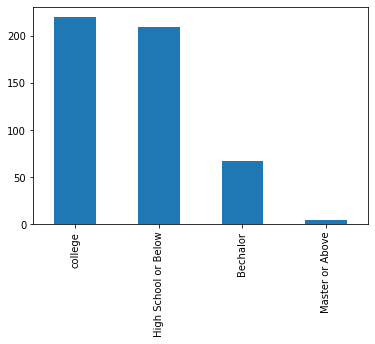

In [40]:
#treatment of incorrected data
data['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

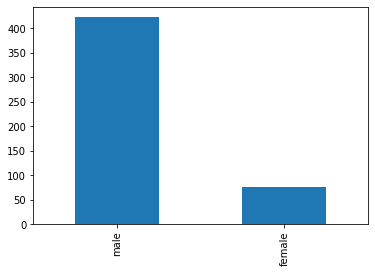

In [42]:
data['Gender'].value_counts().plot(kind='bar')

## 4. Build model

### 1. ratio of different gender

In [43]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [46]:
df_gender = pd.pivot_table(data=data,columns='loan_status',index='Gender',
                          values='Loan_ID',aggfunc=np.size)

In [47]:
df_gender

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
Gender,,,
female,10,14,53
male,90,86,247


In [49]:
df_gender['ratio of loan']=df_gender.apply(np.sum,axis=1)/df_gender.sum().sum()
df_gender

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF,ratio of loan
Gender,,,,
female,10,14,53,0.154
male,90,86,247,0.846


In [51]:
df_gender['ratio of past_due_date']=df_gender['COLLECTION']/df_gender.sum(axis=1)
df_gender

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF,ratio of loan,ratio of past_due_date
Gender,,,,,
female,10,14,53,0.154,0.129611
male,90,86,247,0.846,0.212341


No handles with labels found to put in legend.


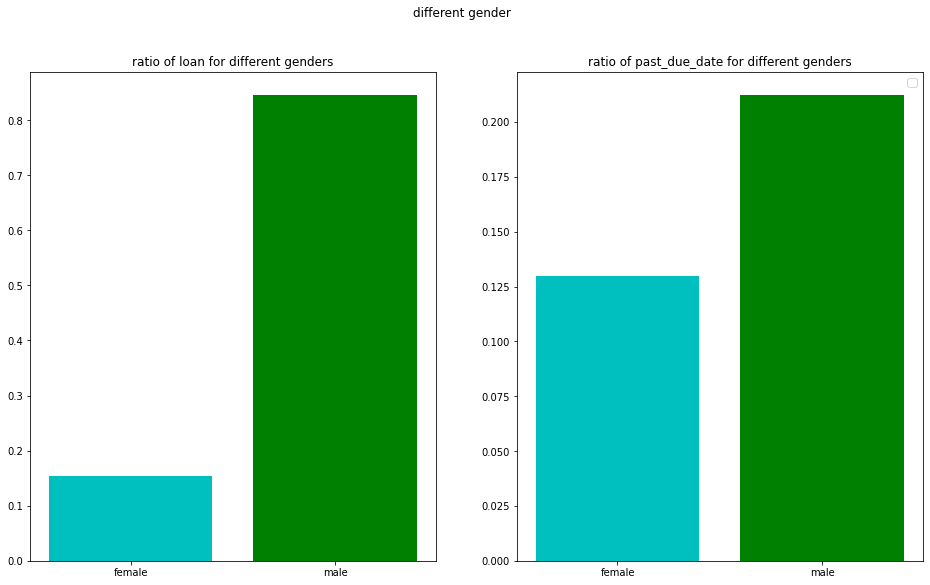

In [54]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.bar(x=df_gender.index,height=df_gender['ratio of loan'],color=['c','g'])
plt.title('ratio of loan for different genders')
plt.subplot(122)
plt.bar(x=df_gender.index,height=df_gender['ratio of past_due_date'],color=['c','g'])
plt.title('ratio of past_due_date for different genders')
plt.suptitle('different gender')
plt.show()

### 2. different age


In [57]:
df_age=data.groupby(['age'])['Principal'].sum()

In [61]:
df_age=pd.DataFrame(df_age)

In [62]:
df_age['total amounts'] = df_age['Principal'].cumsum()

In [64]:
df_age['ratio of total amounts']=df_age['total amounts']/df_age['Principal'].sum()
df_age

,Principal,total amounts,ratio of total amounts
age,,,
18,1000,1000,0.002120
19,2000,3000,0.006361
20,4000,7000,0.014843
21,6800,13800,0.029262
22,7300,21100,0.044741
23,8000,29100,0.061705
24,22200,51300,0.108779
25,19400,70700,0.149915
26,44100,114800,0.243427


In [80]:
index_num = df_age[df_age['ratio of total amounts']>0.8].index[0]
index_num
#which means 80% loan are contributed by persons under 36

36

In [81]:
cum_percent = df_age.loc[index_num,'ratio of total amounts']

In [82]:
cum_percent 

0.8180661577608143

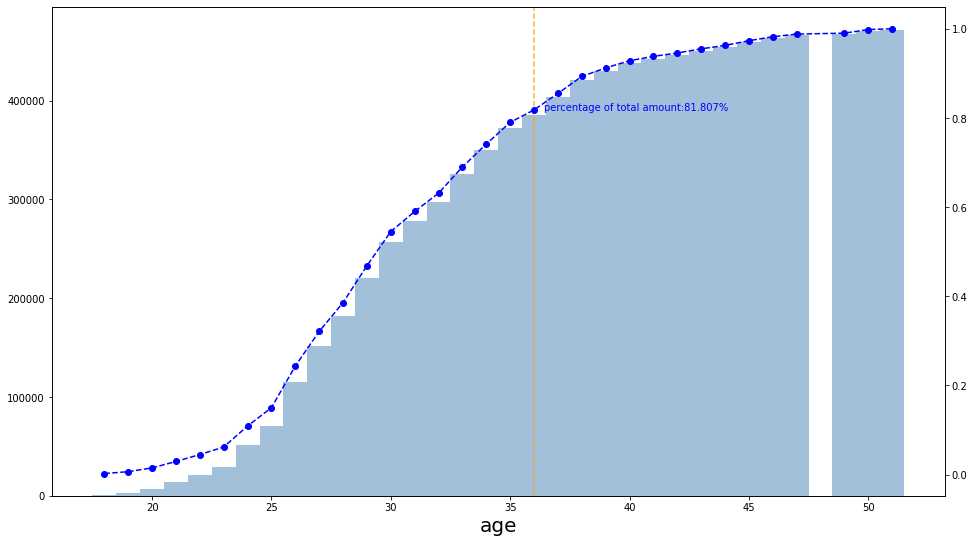

In [89]:
plt.figure(figsize=(16,9))
plt.bar(x=df_age.index, height=df_age['total amounts'],color='steelblue',alpha=0.5, width=1)
plt.xlabel('Age', size=20)
plt.axvline(x=index_num, color='orange',linestyle='--',alpha=0.8)
df_age['ratio of total amounts'].plot(style='--ob',secondary_y=True)
plt.text(index_num+0.4,cum_percent,'percentage of total amount:%.3f%%' %(float(cum_percent)*100),color='b')

plt.show()

In [92]:
data['age_bin'] = pd.cut(data['age'],[17,24,30,36,42,48,51],right=True)

In [94]:
df_age = pd.pivot_table(data=data, columns='loan_status',
                       index = 'age_bin',values='Loan_ID',
                       aggfunc=np.size)

In [95]:
df_age

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
age_bin,,,
"(17, 24]",12,10,33
"(24, 30]",45,45,125
"(30, 36]",25,23,89
"(36, 42]",14,16,35
"(42, 48]",3,5,14
"(48, 51]",1,1,4


In [99]:
df_age['loan times']=df_age.sum(axis=1)

In [100]:
df_age['loan times distribution']=df_age['loan times']/df_age['loan times'].sum()

In [101]:
df_age['loan times distribution%'] = df_age['loan times distribution'].apply(lambda x: format(x,'.3%'))

Text(0, 0.5, 'loan times distribution')

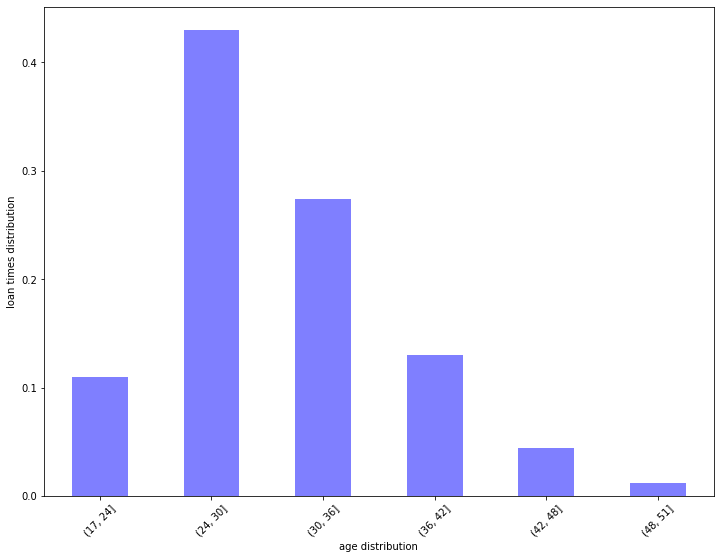

In [103]:
plt.figure(figsize=(12,9))
df_age['loan times distribution'].plot(kind='bar',rot=45,color='b',alpha=0.5)
plt.xlabel('age distribution')
plt.ylabel('loan times distribution')

### 3. different education backgroud

In [108]:
df_edu = pd.pivot_table(data=data,columns='loan_status',index='education',values='Loan_ID',aggfunc=np.size)

In [109]:
df_edu

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
education,,,
Bechalor,11.0,15.0,41.0
High School or Below,49.0,37.0,123.0
Master or Above,1.0,NaN,3.0
college,39.0,48.0,133.0


In [116]:
df_edu['loan times'] = df_edu.sum(axis=1)
df_edu['ratio of loan times']=df_edu['loan times']/df_edu['loan times'].sum()
df_edu['ratio of passed due date']=df_edu['COLLECTION']/df_edu['loan times'].sum()

In [117]:
df_edu

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF,load times,loaN times,loan times,ratio of loan times,ratio of passed due date
education,,,,,,,,
Bechalor,11.0,15.0,41.0,67.0,134.0,804.268,0.134,0.001833
High School or Below,49.0,37.0,123.0,209.0,418.0,2508.836,0.418,0.008164
Master or Above,1.0,NaN,3.0,4.0,8.0,48.016,0.008,0.000167
college,39.0,48.0,133.0,220.0,440.0,2640.880,0.440,0.006498


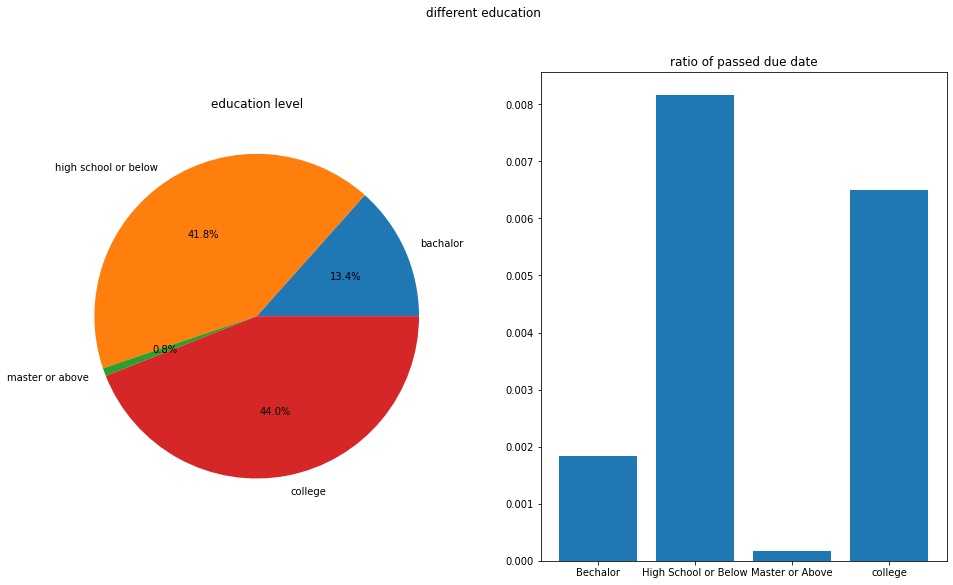

In [124]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.pie(x=df_edu['ratio of loan times'],labels = ['bachalor','high school or below','master or above','college'],
       autopct='%.1f%%')
plt.title('education level')
plt.subplot(122)
plt.bar(x=df_edu.index,height=df_edu['ratio of passed due date'])
plt.title('ratio of passed due date')
plt.suptitle('different education ')
plt.show()

In [127]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'age_bin'],
      dtype='object')

In [134]:
def trans(data,col,ind):
    df = pd.pivot_table(data=data,columns=col, index=ind,
                       values = 'Loan_ID',aggfunc=np.size)
    df['loan times'] = df.apply(np.sum,axis=1)
    df['ratio of loan times']=df['loan times']/df['loan times'].sum()
    df['ratio of passed due date']=df['COLLECTION']/df['loan times'].sum()
    
    plt.figure(figsize=(16,9))
    plt.subplot(121)
    plt.pie(x=df['ratio of loan times'],labels = df.index,autopct='%.1f%%')
    plt.title('%s ratio' %ind)
    plt.subplot(122)
    plt.bar(x=df.index,height=df['ratio of passed due date'])
    plt.title('Different s% ratio of passed due date' %ind)
    plt.suptitle(' Different %s ' %ind)
    plt.show()
    return df

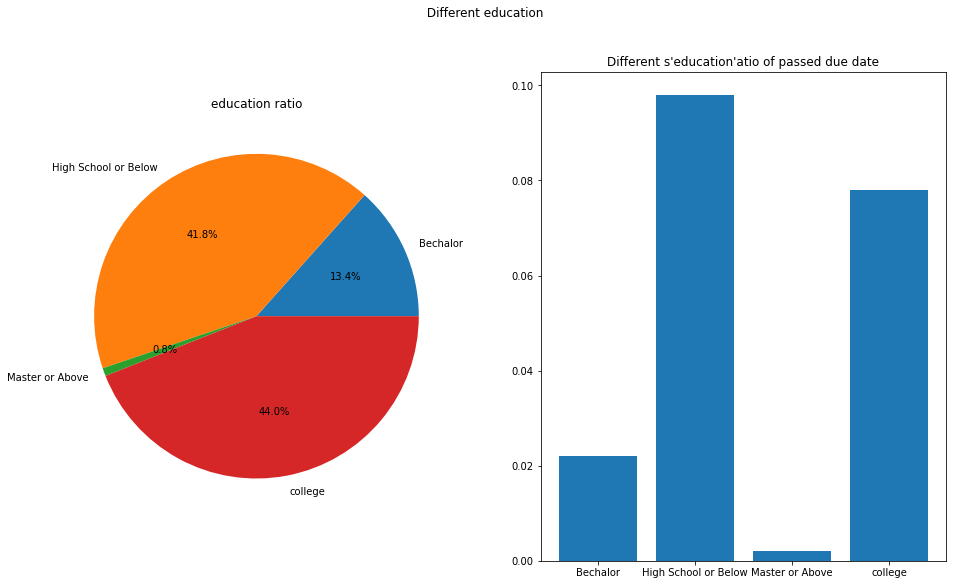

loan_status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF,loan times,ratio of loan times,ratio of passed due date
education,,,,,,
Bechalor,11.0,15.0,41.0,67.0,0.134,0.022
High School or Below,49.0,37.0,123.0,209.0,0.418,0.098
Master or Above,1.0,NaN,3.0,4.0,0.008,0.002
college,39.0,48.0,133.0,220.0,0.440,0.078


In [135]:
trans(data,'loan_status','education')